<a href="https://colab.research.google.com/github/yowsitian/computingMath2021/blob/main/17206662_1_Wk10_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Yow Si Tian

Matrix No: 17206662/1

In [96]:
import numpy as np
import matplotlib.pyplot as plt

In [97]:
a = np.matrix('1. 2. 3. 4.; 5. 5. 6. 7.; 1. 4. 2. 3.; 5. 3. 2. 1.; 8. 1. 2. 2.')

In [98]:
# find mean 
mean = []
for i in range(a.shape[1]):
  mean.append(np.sum(a[:,i])/len(a[:]))

# find standard deviation
std = []
for i in range(a.shape[1]):
  tempMean = np.zeros((a.shape[0],1))
  tempMean.fill(mean[i])
  std.append(np.sqrt(np.sum(np.square(np.subtract(a[:,i],tempMean)))/(a.shape[0]-1)))

In [99]:
# Step 1 Standardize Datasets
for i in range (a.shape[1]):
    tempMean = np.zeros((a.shape[0],1))
    tempMean.fill(mean[i])
    tempStd = np.zeros((a.shape[0],1))
    tempStd.fill(std[i])
    a[:,i] = (a[:,i] - tempMean)/tempStd

In [100]:
# Calculate covariance matrix
a = np.squeeze(np.asarray(a))
def getValue(x,y):
  sum = 0
  for i in range (a.shape[0]):
    sum += a[i][x]*a[i][y]
  sum /= a.shape[0]
  return sum
  
c = np.zeros((a.shape[1],a.shape[1]))
for i in range (a.shape[1]):
  for j in range (a.shape[1]):
    c[i][j] = getValue(i,j)

In [101]:
# Calculate Eigenvalues and Eigenvectors and sorting
lambda_ = np.zeros((a.shape[1],a.shape[1]))
eigvals, eigvecs = np.linalg.eig(c)
idx = eigvals.argsort()[::-1]   
eigvals = eigvals[idx]
eigvecs = eigvecs[:,idx]

In [102]:
# Transform
Back_computed_matrix_transform = []
original = []
for i in range(a.shape[1]):
  Matrix_transform = np.dot(a,eigvecs[:,:i+1])
  backComputed = np.dot(Matrix_transform,np.linalg.pinv(eigvecs[:,:i+1]))
  Back_computed_matrix_transform.append(backComputed)
  original.append(backComputed*std + mean)

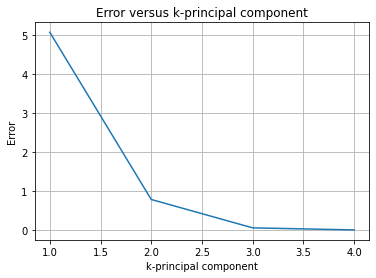

In [105]:
a = np.matrix('1. 2. 3. 4.; 5. 5. 6. 7.; 1. 4. 2. 3.; 5. 3. 2. 1.; 8. 1. 2. 2.')
error = []
for i in range (a.shape[1]):
  error.append((1/(2*a.shape[1]))*np.sum(np.square(np.subtract(a, original[i]))))

k = [1,2,3,4]
plt.plot(k,error)
plt.title('Error versus k-principal component' )
plt.xlabel('k-principal component')
plt.ylabel('Error')
plt.grid(True)
plt.show()

Q5: Why is the error reducing as k increases?

Higher k would lead to less smoothening of data as we preserve more characteristics in data. With this, the regularization is less and more accurate, i.e. less errors.